# 아프리카 심장병 예측 ('범주 데이터' 문제)

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#경로 변경
import os 
os.getcwd()
os.chdir('C:\\Users\\jangs\\archive')

# data frame, target: chd가 포함 되어있음
heart= pd.read_csv('SAheart.csv')

In [ ]:
# 기본탐색 
def inspect_data(df):
    print('상위 5개 데이터\n')
    print(heart.head())
    print('\n데이터타입\n')
    print(heart.dtypes)
    print('\n기술통계\n')
    print(heart.describe())
    print('\n결측치 체크\n')
    print(heart.isna().sum())
inspect_data(heart)

In [3]:
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


In [9]:
#인코딩 변수 확인 
heart.dtypes #famhist  , chd   >> 인코딩이 필요한 변수

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd           object
dtype: object

In [10]:
#결측치 확인 
heart.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [11]:
#인코딩 
heart.chd.replace({'Si': 1, 'No': 0}, inplace=True) 
heart.famhist.replace({'Absent': 0, 'Present': 1}, inplace=True)

In [17]:
heart.chd.value_counts() #

0    302
1    160
Name: chd, dtype: int64

In [18]:
heart.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object


히스토그램



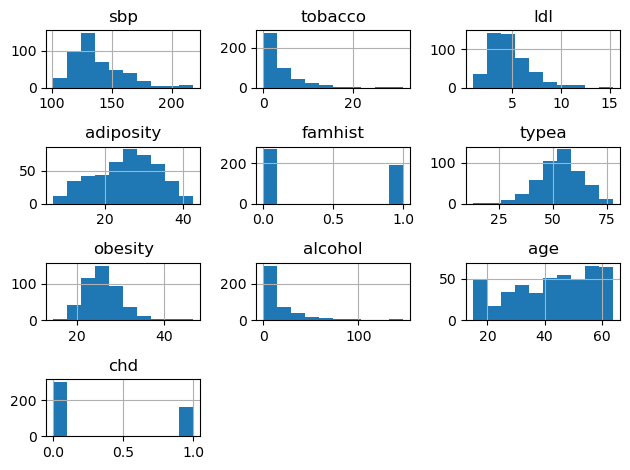


박스플랏



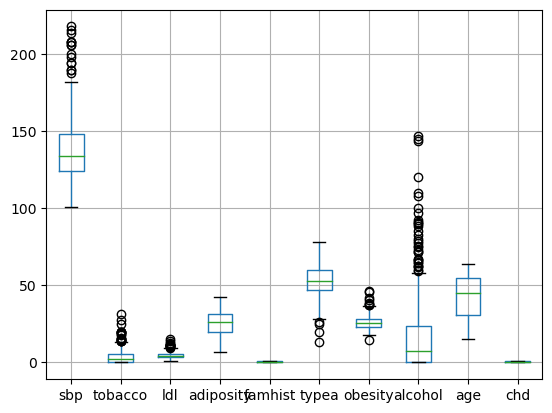


카운트플랏



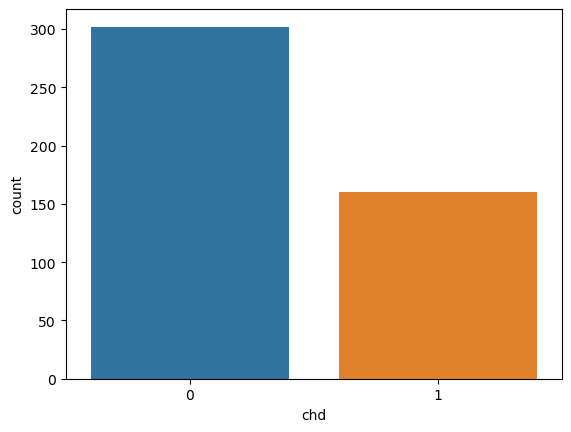


상관관계



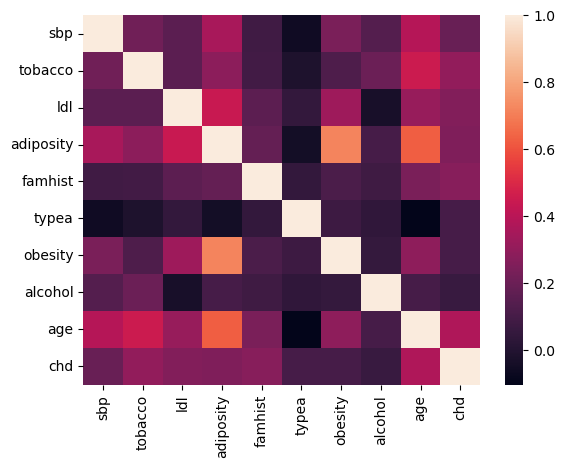


산점도



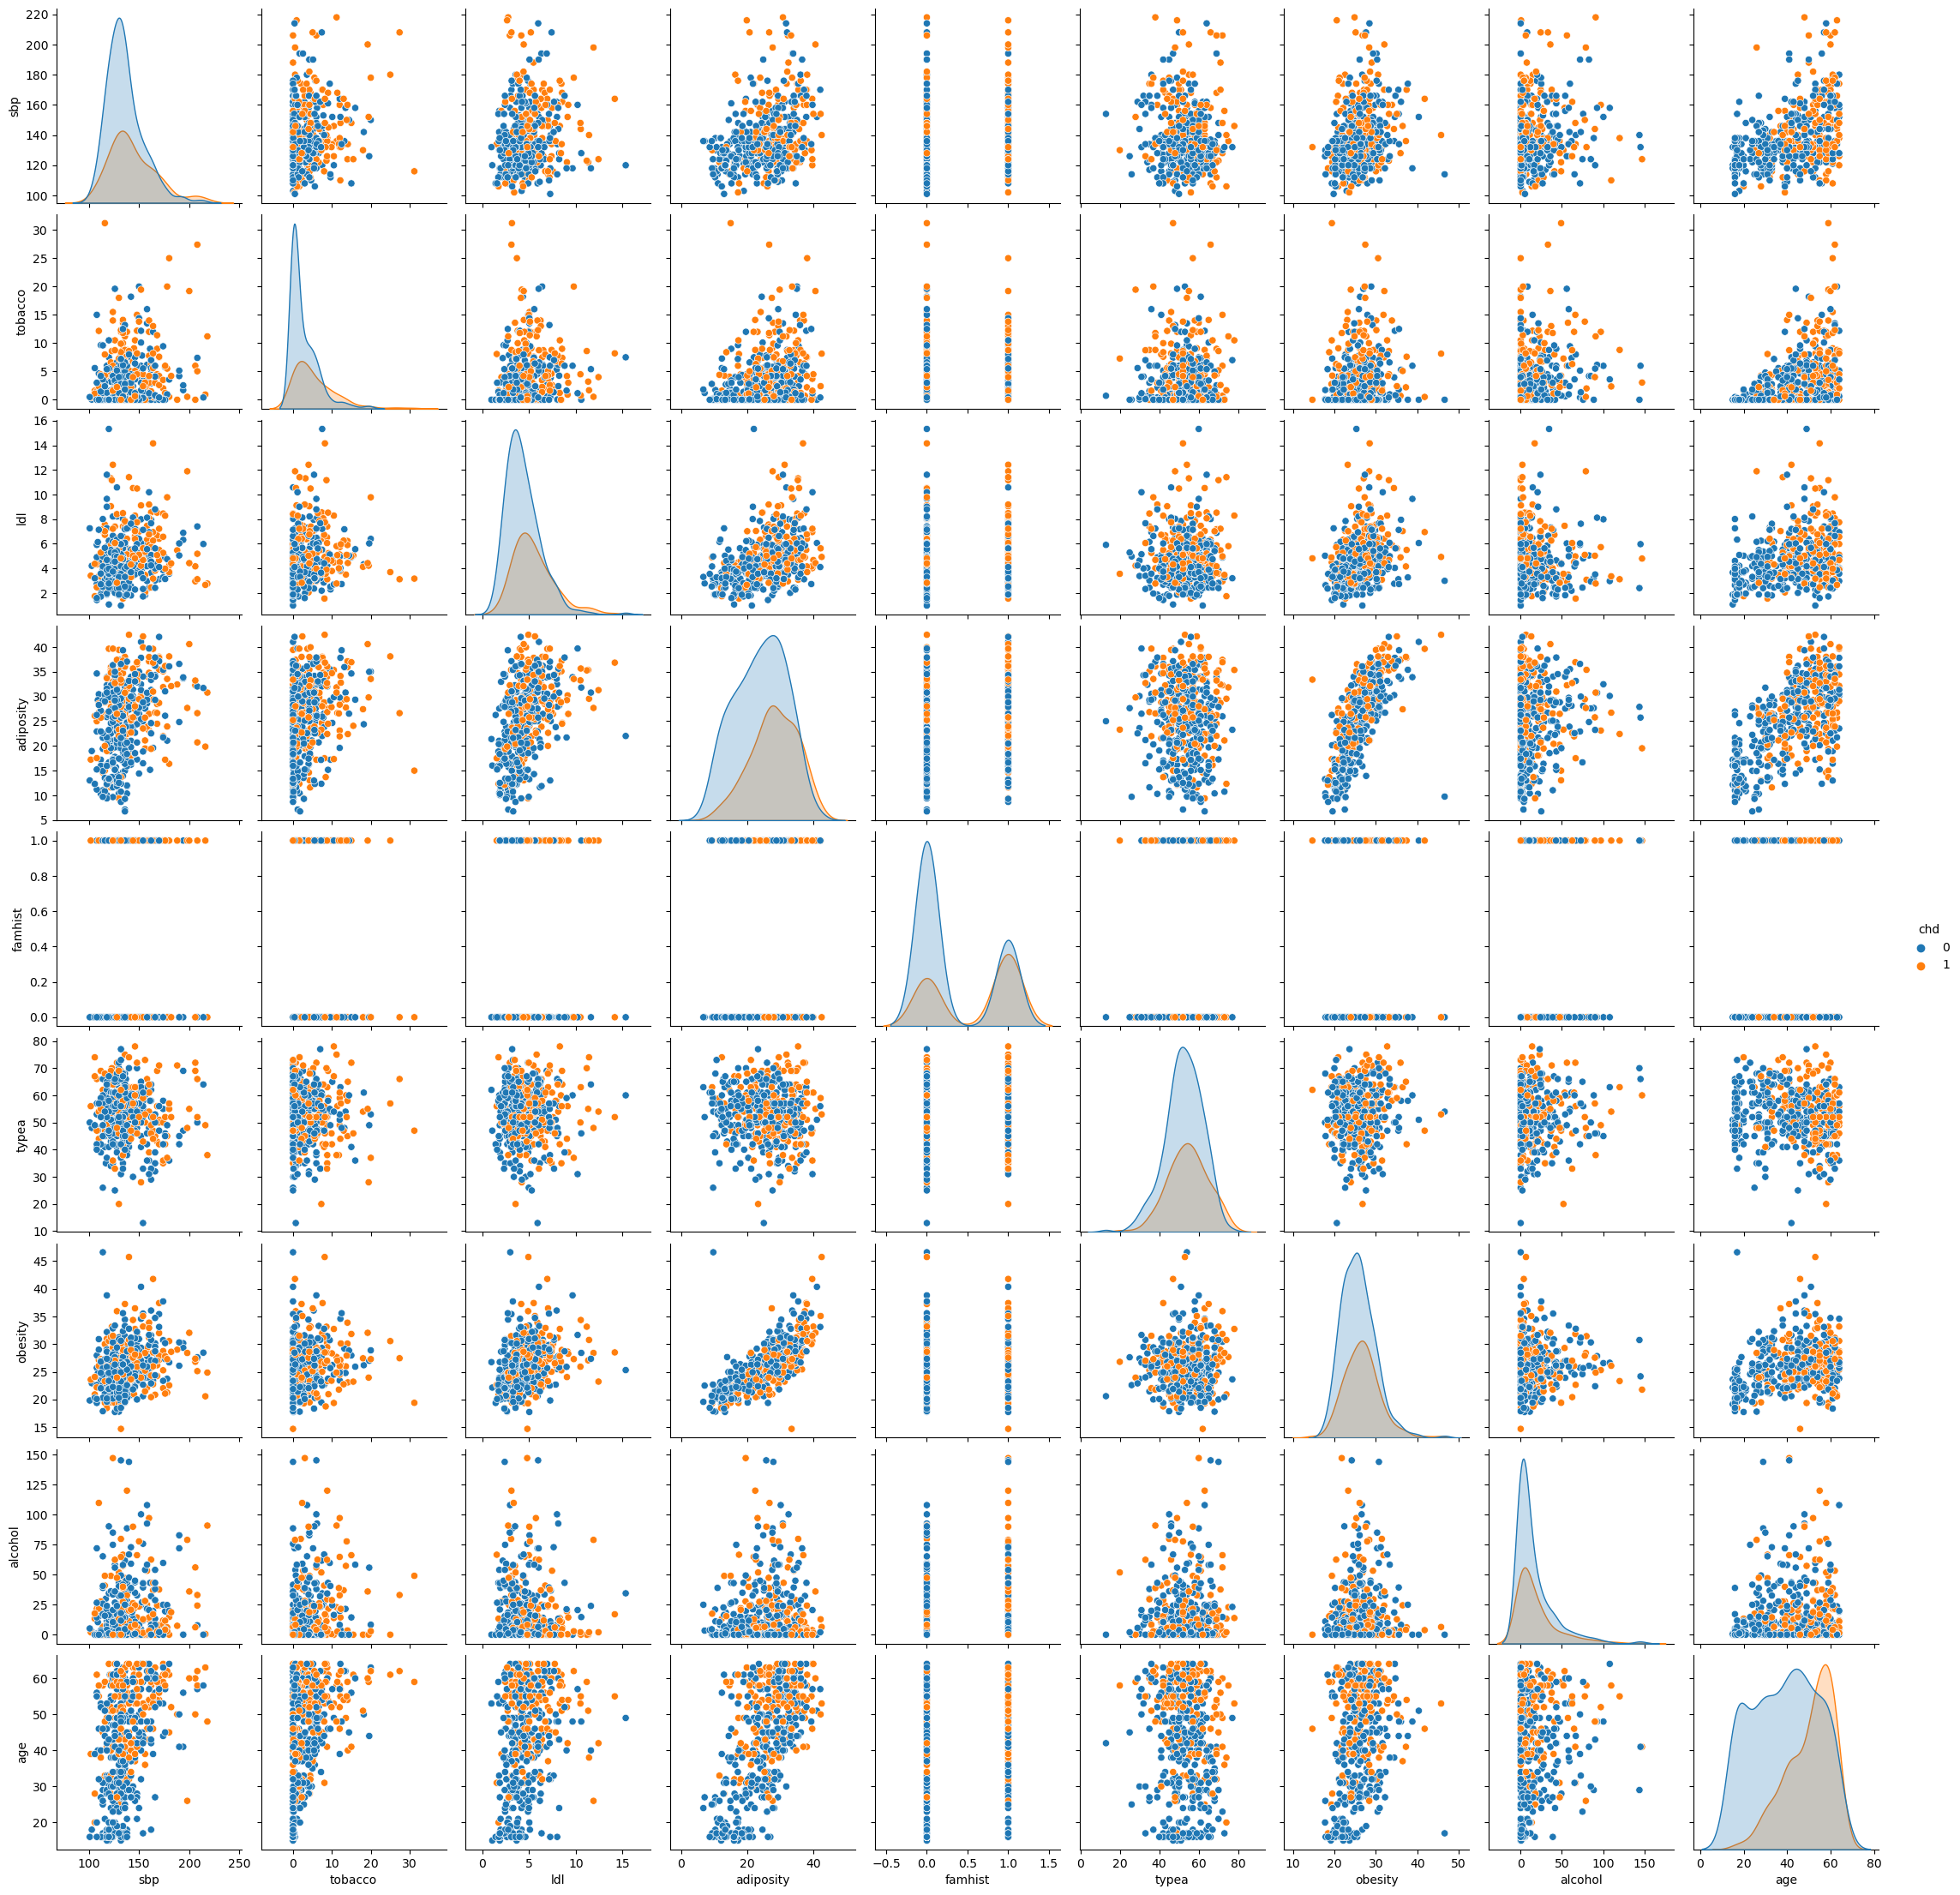

In [19]:
# 변수분석 및 시각화 
# category를 사용하여 데이타 프레임에 있는 특정 컬럼 추출 
def visualize_data(df, category):
    print('\n히스토그램\n')
    df.hist()
    plt.tight_layout()
    plt.show()
    
    print('\n박스플랏\n')
    df.boxplot()
    plt.show()
    
    print('\n카운트플랏\n')
    sns.countplot(x=df.iloc[:,-1]) #마지막 열에 대해서 
    plt.show()
    
    print('\n상관관계\n')
    sns.heatmap(df.corr())
    plt.show()
    
    print('\n산점도\n')
    sns.pairplot(df, hue=category)
    plt.show()

visualize_data(heart, 'chd')

In [21]:
#x, y 분리 
y = heart_dis.chd
x = heart_dis.drop('chd', axis=1)

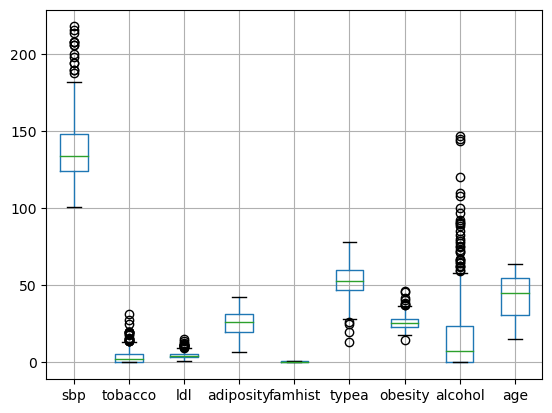

In [23]:
#scailing
x.boxplot()
plt.show()

In [24]:
#범주 데이터; minmaxscaler 스케일림
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
#Train and test split 훈련, 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'


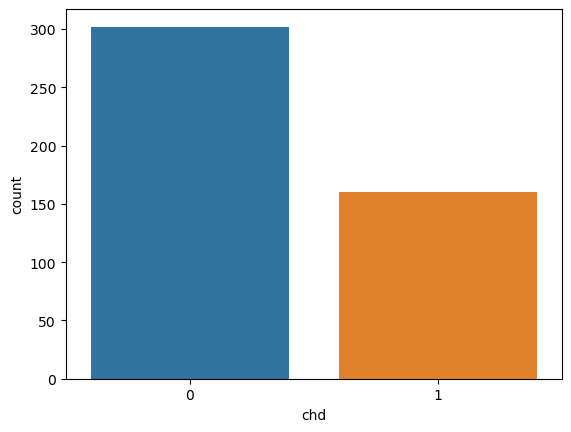

In [27]:
#resampling 확인 
sns.countplot(x=heart.iloc[:,-1]) #마지막 열에 대해서 
plt.show()

In [28]:
#resample : Undersampler 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

In [29]:
y_rus.value_counts() #resample 확인 

0    125
1    125
Name: chd, dtype: int64

In [32]:
#모델학습 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [39]:
#함수로 train하는 방법: 반복되는 과정의 묶음 
from sklearn.model_selection import cross_val_score

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train) #훈련데이터로 학습  
    score = model.score(x_test, y_test) # 모델평가 (r2_score)
    print('test_score=', score)
    cv = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy') 
    print(cv)
    return score, cv

In [40]:
# list로 score, cv_score 저장 
score_lst = []
cv_lst = []

In [41]:
# 회귀분석
lr_model = LogisticRegression()
lr_score, lr_cv = evaluate_model(lr_model, x_train, y_train, x_test, y_test)
lr_score, lr_cv

score_lst.append(lr_score)
cv_lst.append(lr_cv)

test_score= 0.7526881720430108
[0.8        0.7        0.8        0.88888889 0.77777778 0.88888889
 0.55555556 0.44444444 0.66666667 0.66666667]


In [42]:
#의사결정 트리
dt_model = DecisionTreeClassifier()
dt_score, dt_cv = evaluate_model(dt_model, x_train, y_train, x_test, y_test)
dt_score, dt_cv

score_lst.append(dt_score)
cv_lst.append(dt_cv)

test_score= 0.6129032258064516
[0.5        0.8        0.5        0.66666667 0.55555556 0.77777778
 0.33333333 0.55555556 0.66666667 1.        ]


[]

In [43]:
#랜덤 포레스트
rf_model = RandomForestClassifier()
rf_score, rf_cv = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
rf_score, rf_cv

score_lst.append(rf_score)
cv_lst.append(rf_cv)

test_score= 0.7204301075268817
[0.7        0.6        0.6        0.77777778 0.55555556 0.66666667
 0.44444444 0.44444444 0.44444444 0.77777778]


In [44]:
#LDA 분석 방법 
lda_model = LinearDiscriminantAnalysis()
lda_score, lda_cv = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
score_lst.append(rf_score)
cv_lst.append(rf_cv)

test_score= 0.7204301075268817
[0.8        0.7        0.6        0.66666667 0.55555556 0.66666667
 0.44444444 0.44444444 0.55555556 0.77777778]


In [45]:
#knn: 최근접 이웃법
# 최근접이웃법
knn = KNeighborsClassifier()
knn_score, knn_cv = evaluate_model(knn,x_train, y_train, x_test, y_test)

score_lst.append(knn_score)
cv_lst.append(knn_cv)

test_score= 0.6774193548387096
[0.8        0.8        0.6        0.66666667 0.77777778 0.77777778
 0.55555556 0.33333333 0.44444444 0.77777778]


In [46]:
# svm: 서포트 벡터 머신
svm = SVC()
svm_score, svm_cv = evaluate_model(svm,x_train, y_train, x_test, y_test)

score_lst.append(svm_score)
cv_lst.append(svm_cv)

test_score= 0.7634408602150538
[0.8        0.7        0.8        0.77777778 0.77777778 0.77777778
 0.55555556 0.55555556 0.55555556 0.66666667]


In [47]:
# score 평가 
# 결정계수 테이블 
score_df = pd.DataFrame(score_lst)
score_df.index = ['LR', 'DT', 'RF', 'LDA', 'KNN', 'SVM']
score_df.columns = ['score']

In [48]:
#평균, 표준편차 테이블로 비교
cv_df = pd.DataFrame(cv_lst, index=score_df.index).T
cv_summary = pd.DataFrame = ({'mean': cv_df.mean(),
                             'std': cv_df.std()})

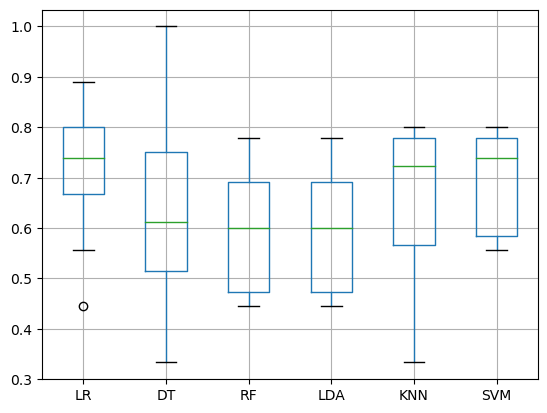

In [49]:
cv_df.boxplot()
plt.show()

In [50]:
score_df

,score
LR,0.752688
DT,0.612903
RF,0.720430
LDA,0.720430
KNN,0.677419
SVM,0.763441


In [51]:
cv_df

,LR,DT,RF,LDA,KNN,SVM
0,0.800000,0.500000,0.700000,0.700000,0.800000,0.800000
1,0.700000,0.800000,0.600000,0.600000,0.800000,0.700000
2,0.800000,0.500000,0.600000,0.600000,0.600000,0.800000
3,0.888889,0.666667,0.777778,0.777778,0.666667,0.777778
4,0.777778,0.555556,0.555556,0.555556,0.777778,0.777778
5,0.888889,0.777778,0.666667,0.666667,0.777778,0.777778
6,0.555556,0.333333,0.444444,0.444444,0.555556,0.555556
7,0.444444,0.555556,0.444444,0.444444,0.333333,0.555556
8,0.666667,0.666667,0.444444,0.444444,0.444444,0.555556
9,0.666667,1.000000,0.777778,0.777778,0.777778,0.666667


In [52]:
cv_df.mean()

LR     0.718889
DT     0.635556
RF     0.601111
LDA    0.601111
KNN    0.653333
SVM    0.696667
dtype: float64

In [ ]:
# >> LR이 제일 정확; (분산값 고려해서) 

In [ ]:
#fintunig 

In [ ]:
#test 만들어서 확인 

# voting example

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('log', log_model), ('rf', rf), ('svm', svm)], voting='hard')
voting_model
voting_model.fit(x_smote, y_smote)
voting_model.score(x_test, y_test)

40days 10:32 AM
score_lst = []
model_lst = []
for model in [log_model, rf, svm]:
    model.fit(x_smote, y_smote)
    score_lst.append(model.score(x_test, y_test))
    model_lst.append(model.__class__.__name__)

40days 10:38 AM
# 개별 모델 비교
score_lst = []
model_lst = []
for model in [log_model, rf, svm]:
    model.fit(x_smote, y_smote)
    score_lst.append(model.score(x_test, y_test)) #개별 모델의 점수들
    model_lst.append(model.__class__.__name__) #개별 모델의 이름들
score_lst.append(voting_score) #보팅 점수 추가
model_lst.append(voting_model.__class__.__name__) #보팅 모델이름 추가
model_lst

In [53]:
#보팅할 모델 생성 
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

In [55]:
#보팅할 모델,  보팅방법 설정
from sklearn.ensemble import VotingClassifier
import 
voting_model = VotingClassifier(estimators=[('log', log_model), ('rf', rf), ('svm', svm)], voting='hard')
voting_model

#보팅할 모델 학습 및 평가 
voting_model.fit(x_rus, y_rus)
voting_model.score(x_test, y_test)

0.7096774193548387

In [64]:
# 개별 모델 비교
score_lst1 = []
model_lst1 = []
for model in [log_model, rf, svm]:
    model.fit(x_rus, y_rus)
    score_lst1.append(model.score(x_test,y_test)) #개별 모델의 점수들
    model_lst1.append(model.__class__.__name__) #개별 모델의 이름
score_lst1.append(voting_model.score(x_test, y_test)) #보팅 점수 추가 

In [74]:
#for loop를 이용한 방법 이외에도 ;concat 등의 방법으로 이어 붙이기를 할수있음
#model_lst1.append(voting_model.__class__.__name__) 
model_lst1

['LogisticRegression', 'RandomForestClassifier', 'SVC', 'VotingClassifier']

In [67]:
score_lst1

[0.6989247311827957,
 0.6451612903225806,
 0.7204301075268817,
 0.7096774193548387]

In [76]:
#점수요약
pd.DataFrame(score_lst1,index=model_lst1,columns=['accuracy'])

TypeError: 'dict' object is not callable

# BAGGING EXAMPLE

In [71]:
from sklearn.ensemble import BaggingClassifier
 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.05,
    bootstrap=True,
    n_jobs=-1,
    random_state=1)
bag_model

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.05,
                  n_estimators=100, n_jobs=-1, random_state=1)

In [73]:
bag_model.fit(x_rus, y_rus)
bag_model.score(x_test, y_test)

0.6881720430107527

# ADA BOOST EXAMPLE

In [77]:
from sklearn.ensemble import AdaBoostClassifier
# 차이점 알아보기 


ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators = 200,
    learning_rate=.5
)

In [79]:
ada_model.fit(x_rus, y_rus)
ada_model.score(x_test, y_test) #0.6559139784946236

0.5376344086021505

# Gradient Boosting Example

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
#학습기 들어가지 않음

gd_model = GradientBoostingClassifier(random_state=0) #값을 고정 


In [83]:
gd_model.fit(x_rus,y_rus)
gd_model.score(x_test, y_test)

0.6559139784946236

In [128]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(gd_model, param_grid=params, cv=5, n_jobs=-1, verbose=1) #최적 파라미터 추천 하는 알고리즘 

In [129]:
# 학습
grid_cv.fit(x_rus, y_rus)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 500]},
             verbose=1)

In [130]:
#파라미터 추천
grid_cv.best_params_ #{'learning_rate': 0.05, 'n_estimators': 100}

{'learning_rate': 0.05, 'n_estimators': 100}

In [131]:
grid_cv.best_score_

0.66

In [132]:
#추천된 파라미터로 재학습
gd_model = GradientBoostingClassifier(
    random_state=0,
    learning_rate=0.05, 
    n_estimators=100
    )
gd_model.fit(x_rus, y_rus)
gd_model.score(x_test, y_test) #0.7311827956989247

0.6666666666666666

In [ ]:
#recoomend parameter 예측 결과값이 나오지 않는 경우 
# fold된 횟수를 조정 (cv 낮은 경우 >> 늘려보기 )
# 직접 loop돌리면서 정확도 확인 

# XGBoost Example 

In [133]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 3.2 MB/s eta 0:00:23
                                              0.2/70.9 MB 2.3 MB/s eta 0:00:31
                                              0.3/70.9 MB 2.7 MB/s eta 0:00:27
                                              0.5/70.9 MB 2.9 MB/s eta 0:00:25
                                              0.6/70.9 MB 2.9 MB/s eta 0:00:25
                                              0.8/70.9 MB 2.9 MB/s eta 0:00:24
                                              0.9/70.9 MB 3.2 MB/s eta 0:00:22
                                              1.0/70.9 MB 2.8 MB/s eta 0:00:25
                                              1.0/70.9 MB 2.6 MB/s eta 0:00:27
                                              1.2/70.9 MB 2.7 MB/s eta 0:00:26
                                              1.2/70.9 MB 2.5 MB/s eta 0:00:28
                                              1.4/70.9 MB 2

In [137]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 400,
             learning_rate = .1,
             max_depth = 3)
xgb_model.fit(x_rus, y_rus)

TypeError: unhashable type: 'dict'

In [138]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 400,
             learning_rate = .1,
             max_depth = 3)
xgb_model.fit(x_rus, y_rus)
xgb_model.score(x_test, y_test) #0.7204301075268817
plot_importance(xgb_model)

TypeError: unhashable type: 'dict'